In [3]:
import pandas as pd
import numpy
from sklearn.cluster import KMeans

In [7]:
features = numpy.loadtxt('modifiedTraining.csv', delimiter=',')
labels = numpy.loadtxt('labels.csv', delimiter=',')

In [8]:
features.shape

(15420, 159)

In [9]:
labels.shape

(15420,)

In [10]:
numpy.random.seed(100)

In [12]:
#trainingSize = features.shape[0]*8//10

In [11]:
kmeans = KMeans(n_clusters=2, n_init=10)

In [13]:
y = kmeans.fit_predict(features)

In [17]:
sum(labels != y)

7796

In [21]:
kmeans5 = KMeans(n_clusters=5, n_init=10)
y5 = kmeans5.fit_predict(features)


In [22]:
from collections import Counter

In [23]:
Counter(y5)

Counter({0: 3090, 1: 3080, 2: 3088, 3: 3078, 4: 3084})

In [24]:
kmeans.cluster_centers_

array([[8.44139004e-02, 7.30031120e-02, 7.67634855e-02, 8.44139004e-02,
        9.60840249e-02, 7.94865145e-02, 8.64885892e-02, 9.25829876e-02,
        8.94709544e-02, 7.45591286e-02, 8.49325726e-02, 7.78008299e-02,
        2.07598548e-01, 2.28345436e-01, 2.34828838e-01, 2.22121369e-01,
        1.07105809e-01, 1.58195021e-01, 1.72847510e-01, 1.27982365e-01,
        1.11903527e-01, 1.39782158e-01, 1.51063278e-01, 1.38226141e-01,
        3.28060166e-02, 9.07676349e-04, 1.11125519e-01, 7.00207469e-03,
        4.33680869e-19, 2.99533195e-02, 1.83739627e-01, 5.18672199e-04,
        2.16840434e-19, 1.54304979e-01, 5.18672199e-04, 5.44605809e-03,
        1.68568465e-03, 2.41312241e-01, 2.59336100e-04, 7.65041494e-03,
        3.63070539e-03, 2.02022822e-01, 1.71161826e-02, 1.05031120e-01,
        8.94968880e-01, 1.29668050e-04, 1.61307054e-01, 2.44813278e-01,
        9.20643154e-03, 2.98236515e-03, 1.69346473e-01, 2.20306017e-01,
        1.91908714e-01, 1.29668050e-04, 8.32468880e-02, 7.131742

In [25]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [48]:
sse = []
for k in range(3,35):
    model = KMeans(n_clusters=k)
    model.fit(features)
    sse.append(sum(numpy.min(cdist(features, model.cluster_centers_), axis=1))/features.shape[0])

Text(0,0.5,'SSE')

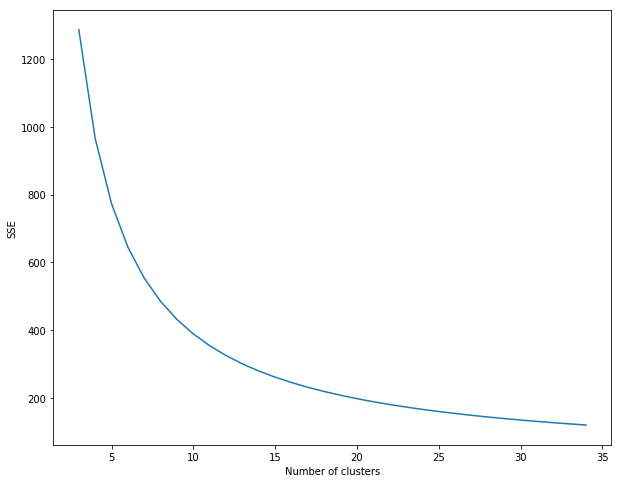

In [54]:
plt.figure(figsize=(10,8))
plt.plot(list(range(3,35)), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [33]:
numpy.min(cdist(features, kmeans.cluster_centers_),axis=1).shape

(15420,)

In [34]:
cdist(features, kmeans.cluster_centers_).shape

(15420, 2)

In [50]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Creates a new figure.
    
    Parameters
    ----------
    
    num : integer or string, optional, default: none
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : tuple of integers, optional, default: None
        width, height in inches. If not provided, defaults to rc
        figure.figsize.
    
    dpi : integer, optional, default: None
        resolu